<a href="https://colab.research.google.com/github/riyapappu/NLP-test/blob/main/NLP_Program2_SMS_train%2C_SMS_test_DS_OCT_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SMS_train.csv',encoding="ISO-8859-1")
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


used encoding="ISO-8859-1" because error displayed while reading csv file so encoded the file

In [2]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SMS_test.csv',encoding="ISO-8859-1")
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


concatenating two df

In [3]:
df=pd.concat([df1,df2],ignore_index=True)
df
#while concatenating to ignore the index use ignore_index=True

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

visualizing value count

<Axes: xlabel='Label', ylabel='count'>

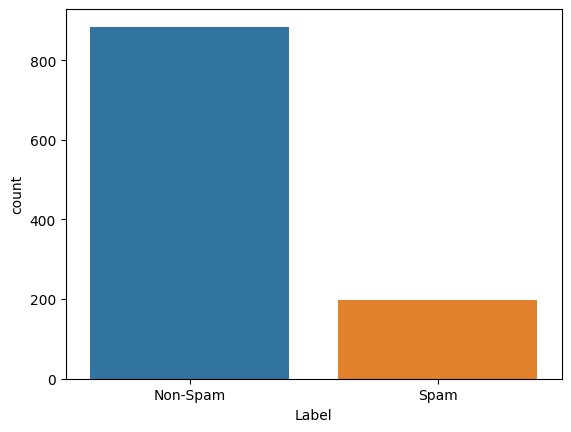

In [5]:
import seaborn as sns
sns.countplot(x='Label',data=df)

Drop S.No. column

In [6]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


Use label encoder to change values of label to number

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
df


,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


checking value classification

In [8]:
le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
print(le_name_mapping)

{'Non-Spam': 0, 'Spam': 1}


taking textual data

In [9]:
msg=df.Message_body
msg

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

replacing special characters

In [10]:
msg=msg.str.replace("[^a-zA-Z0-9]+"," ")
msg

<ipython-input-10-8a19bb693a08>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace("[^a-zA-Z0-9]+"," ")


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

tokenization

In [11]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [12]:
msg=msg.apply(lambda X:[stemmer.stem(token.lower()) for token in tk.tokenize(X)]).apply(lambda token:" ".join(token))
msg

0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

importing stopwords

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Removing stopwords

In [14]:
msg=msg.apply(lambda X:[token for token in tk.tokenize(X) if token not in sw]).apply(lambda token:" ".join(token))
msg

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                   b go esplanad fr home
4       2nd time tri 2 contact u u 750 pound prize 2 c...
                              ...                        
1077    7 wonder world 7th 6th ur style 5th ur smile 4...
1078                     tri someth dear read someth exam
1079    sun ah thk mayb dun anythin thk book e lesson ...
1080    symptom u love 1 u like listen song 2 u get st...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(msg)
print(X)

  (0, 1855)	0.5086856793431559
  (0, 2732)	0.5352804139572925
  (0, 2262)	0.6743246681420617
  (1, 1194)	0.19084717659108363
  (1, 2792)	0.2620897628588603
  (1, 1239)	0.3166286972359124
  (1, 2878)	0.22002695063463382
  (1, 1884)	0.25587622919424974
  (1, 1039)	0.29329608266677626
  (1, 2453)	0.26551480891862445
  (1, 682)	0.26551480891862445
  (1, 1481)	0.307577621142851
  (1, 1629)	0.20980773882403927
  (1, 400)	0.3419878575694143
  (1, 612)	0.36211655551990307
  (1, 1313)	0.2588858462402129
  (2, 2553)	0.5165656915002457
  (2, 468)	0.36716239650585775
  (2, 1808)	0.5469696796701571
  (2, 2043)	0.5469696796701571
  (3, 1390)	0.3883344606933877
  (3, 1190)	0.630740525885995
  (3, 1067)	0.5956800313099777
  (3, 1268)	0.3106896135077221
  (4, 2175)	0.24144740187001762
  :	:
  (1079, 1825)	0.2633677871797729
  (1079, 2558)	0.2544650331411059
  (1079, 1617)	0.2410408066920934
  (1079, 633)	0.23101411970886698
  (1079, 2652)	0.4820816133841868
  (1079, 1740)	0.21063371947658105
  (1079, 1

In [16]:
type(X)

scipy.sparse._csr.csr_matrix

In [17]:
vectorizer.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of TfidfVectorizer()>

In [18]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X.shape

(1082, 3002)

In [20]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
#print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       260
           1       0.96      0.66      0.78        65

    accuracy                           0.93       325
   macro avg       0.94      0.83      0.87       325
weighted avg       0.93      0.93      0.92       325

